# Tutorial for Cancer-Biomarkers-from-Clinical-Data

# 1. Data loading and preprocessing

## 1.1. Import the necessary modules

In [1]:
# Library imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Add the path to the src folder
import sys
sys.path.append('src')

# Import project functions
from data_preprocessing import load_data, feature_label_split
from random_forest_model import rf_normal_cancers, plot_important_biomarkers
from desc_stats import descriptive_statistics, cancer_biomarkers_uniquely_high, cancer_biomarkers_higher_side_filtering
from stats_tests import find_shared_nature_of_biomarkers

## 1.2. Load the data

In [2]:
categories, dfs = load_data('data/clinical_cancer_data.xlsx')

list(enumerate(categories))

[(0, 'Breast'),
 (1, 'Colorectum'),
 (2, 'Esophagus'),
 (3, 'Liver'),
 (4, 'Lung'),
 (5, 'Normal'),
 (6, 'Ovary'),
 (7, 'Pancreas'),
 (8, 'Stomach')]

In [3]:
biomarkers = feature_label_split(dfs[0])[0].columns
list(enumerate(biomarkers))

[(0, 'AFP '),
 (1, 'Angiopoietin-2 '),
 (2, 'AXL '),
 (3, 'CA-125 '),
 (4, 'CA 15-3 '),
 (5, 'CA19-9 '),
 (6, 'CD44 '),
 (7, 'CEA '),
 (8, 'CYFRA 21-1 '),
 (9, 'DKK1 '),
 (10, 'Endoglin '),
 (11, 'FGF2 '),
 (12, 'Follistatin '),
 (13, 'Galectin-3 '),
 (14, 'G-CSF '),
 (15, 'GDF15 '),
 (16, 'HE4 '),
 (17, 'HGF '),
 (18, 'IL-6 '),
 (19, 'IL-8 '),
 (20, 'Kallikrein-6 '),
 (21, 'Leptin '),
 (22, 'Mesothelin '),
 (23, 'Midkine '),
 (24, 'Myeloperoxidase '),
 (25, 'NSE '),
 (26, 'OPG '),
 (27, 'OPN '),
 (28, 'PAR '),
 (29, 'Prolactin '),
 (30, 'sEGFR '),
 (31, 'sFas '),
 (32, 'SHBG '),
 (33, 'sHER2/sEGFR2/sErbB2 '),
 (34, 'sPECAM-1 '),
 (35, 'TGFa '),
 (36, 'Thrombospondin-2 '),
 (37, 'TIMP-1 '),
 (38, 'TIMP-2 ')]

# 2. Analysis of `Ovary`, `Pancreas` and `Liver` samples, taken together with random subsamples of `Normal` samples

In this section, we will see three cancer types for which the list of biomarkers given by random forest classifier contain biomarkers with uniquely high level in the particular cancer type, along with other biomarkers whose Q3 values are in the top 2 among all cancer types. Essentially, in each of these cancer types, we obtain practically viable biomarkers. 

## 2.1. Analysis of `Normal + Ovary` samples

### 2.1.1. Random forest classification for `Normal + Ovary` samples

In [4]:
important_biomarkers_normal_ovary = rf_normal_cancers(categories = categories, 
                                                      dfs = dfs, 
                                                      cancer1_category_index = 6, 
                                                      iterations = 100,
                                                      threshold = 0.04)

Random forest classification: Normal + Ovary

Average Accuracy over 100 iterations: 0.9614

Biomarkers with Importance >= 0.04:
     Biomarker  Importance
3      CA-125     0.159995
29  Prolactin     0.109398
18       IL-6     0.099734
35       TGFa     0.094122
31       sFas     0.075817
16        HE4     0.048810
37     TIMP-1     0.046099


And here's the list of the biomarker indices.

In [5]:
ovary_important_biomarker_indices_in_RF = list(important_biomarkers_normal_ovary.index)
ovary_important_biomarker_indices_in_RF

[3, 29, 18, 35, 31, 16, 37]

### 2.1.2. Filtering through descriptive statistics of biomarkers in `Normal + Ovary` samples

* Uniquely high levels: `CA-125`
* Higher side filtering: `Prolactin` (1st), `HE4` (1st)

Now, we find that CA-125 is present in uniquely high levels in `Ovary` samples.

In [6]:
ovary_biomarkers_uniquely_high = cancer_biomarkers_uniquely_high(categories = categories, 
                                                                 dfs = dfs, 
                                                                 cancer_important_biomarker_indices_in_RF = ovary_important_biomarker_indices_in_RF)


Biomarker 3: CA-125 
Outlier categories with uniquely high Q2 levels: [('Ovary', 155.36)]
Outlier categories with uniquely high Q3 levels: [('Ovary', 486.2925)]


Let's see the biomarkers that pass through the uniquely high level criterion.

In [7]:
[biomarkers[i] for i in ovary_biomarkers_uniquely_high]

['CA-125 ']

And, `Prolactin` and `HE4` pass through the higher side filtering criteria.

In [8]:
ovary_candidates_for_higher_side_filtering = ovary_important_biomarker_indices_in_RF.copy()
ovary_candidates_for_higher_side_filtering.remove(ovary_biomarkers_uniquely_high[0])

ovary_biomarkers_higher_side = cancer_biomarkers_higher_side_filtering(categories = categories,
                                                                       dfs = dfs,
                                                                       cancer_category_index = 6,
                                                                       cancer_candidates_for_higher_side_filtering = ovary_candidates_for_higher_side_filtering)


Biomarker 29: Prolactin 
The biomarker's Q3 level is the highest in the given category.

Biomarker 16: HE4 
The biomarker's Q3 level is the highest in the given category.


Here's the list of biomarkers that pass through the higher side filtering criteria.

In [9]:
[biomarkers[i] for i in ovary_biomarkers_higher_side]

['Prolactin ', 'HE4 ']

Let's collect the biomarker indices that pass through the two descriptive statistics-based filtering criteria.


In [10]:
ovary_selected_biomarkers = ovary_biomarkers_uniquely_high + ovary_biomarkers_higher_side

[biomarkers[i] for i in ovary_selected_biomarkers]

['CA-125 ', 'Prolactin ', 'HE4 ']

For example, let's see an overview of `CA-125` levels in all the cancer types, as well as the normal samples.

In [11]:
# descriptive_statistics(categories = categories, dfs = dfs, biomarker_index = 3)

### 2.1.3. Yuen-Welch's test of `CA-125`, `Prolactin` and `HE4` levels in `Ovary` samples versus all the other cancer types

In [12]:
ovary_shared_nature_of_biomarkers = find_shared_nature_of_biomarkers(
    categories = categories,
    dfs = dfs,
    cancer_category_index = 6,
    cancer_selected_biomarkers = ovary_selected_biomarkers,
    p_threshold = 0.05,
    debug = True
)


Biomarker 3: CA-125 


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Pancreas,Stomach
Ovary,0.001462,0.001462,0.001475,0.001599,0.001514,0.001424,0.001808,0.001532



Biomarker 29: Prolactin 


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Pancreas,Stomach
Ovary,0.000008,0.000057,0.000002,0.006204,0.040432,1.234060e-07,0.000003,0.000002



Biomarker 16: HE4  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Pancreas,Stomach
Ovary,0.005556,0.010388,0.01596,0.007312,0.005633,0.005347,0.053539,0.005956


Now, we have the finalized list of biomarkers. Note that, `HE4` didn't pass the hypothesis test based criterion.

In [13]:
ovary_shared_nature_of_biomarkers

[(3, []), (29, []), (16, [6])]

## 2.2. Analysis of `Normal + Pancreas` samples

### 2.2.1. Random forest classification for `Normal + Pancreas` samples

In [14]:
important_biomarkers_normal_pancreas = rf_normal_cancers(categories = categories, 
                                                         dfs = dfs, 
                                                         cancer1_category_index = 7, 
                                                         iterations = 100, 
                                                         threshold = 0.04)

Random forest classification: Normal + Pancreas

Average Accuracy over 100 iterations: 0.9389

Biomarkers with Importance >= 0.04:
               Biomarker  Importance
5                CA19-9     0.142069
19                 IL-8     0.094102
18                 IL-6     0.080587
33  sHER2/sEGFR2/sErbB2     0.077110
27                  OPN     0.060258
15                GDF15     0.057668
23              Midkine     0.050770
17                  HGF     0.043427


In [15]:
pancreas_important_biomarker_indices_in_RF = list(important_biomarkers_normal_pancreas.index)
pancreas_important_biomarker_indices_in_RF

[5, 19, 18, 33, 27, 15, 23, 17]

### 2.2.2. Filtering through descriptive statistics of biomarkers in `Normal + Pancreas` samples

* Uniquely high levels: `CA19-9`
* Higher side filtering: `sHER2/sEGFR2/sErbB2` (1st)

As an example, we see the descriptive statistics of `CA19-9` in all the cancer types as well as `Normal` samples below.

In [16]:
pancreas_biomarkers_uniquely_high = cancer_biomarkers_uniquely_high(categories = categories,
                                                                    dfs = dfs,
                                                                    cancer_important_biomarker_indices_in_RF = pancreas_important_biomarker_indices_in_RF)


Biomarker 5: CA19-9 
Outlier categories with uniquely high Q2 levels: [('Pancreas', 101.63)]
Outlier categories with uniquely high Q3 levels: [('Pancreas', 316.3)]


In [17]:
pancreas_biomarkers_uniquely_high

[5]

In [18]:
candidates_for_higher_side_filtering = pancreas_important_biomarker_indices_in_RF.copy()
candidates_for_higher_side_filtering.remove(pancreas_biomarkers_uniquely_high[0])

pancreas_biomarkers_higher_side = cancer_biomarkers_higher_side_filtering(categories = categories,
                                                                          dfs = dfs,
                                                                          cancer_category_index = 7,
                                                                          cancer_candidates_for_higher_side_filtering = candidates_for_higher_side_filtering)


Biomarker 19: IL-8 
The biomarker's Q3 level is the third highest in the given category.

Biomarker 33: sHER2/sEGFR2/sErbB2 
The biomarker's Q3 level is the highest in the given category.

Biomarker 15: GDF15 
The biomarker's Q3 level is the highest in the given category.

Biomarker 23: Midkine 
The biomarker's Q3 level is the highest in the given category.


In [19]:
pancreas_biomarkers_higher_side

[19, 33, 15, 23]

In [20]:
pancreas_selected_biomarkers = pancreas_biomarkers_uniquely_high + pancreas_biomarkers_higher_side

[biomarkers[i] for i in pancreas_selected_biomarkers]

['CA19-9 ', 'IL-8 ', 'sHER2/sEGFR2/sErbB2 ', 'GDF15 ', 'Midkine ']

In [21]:
# descriptive_statistics(categories = categories, dfs = dfs, biomarker_index = 5)

### 2.2.3. Yuen-Welch's test of `CA19-9` and `SHER2/sEGFR2/sErbB2` levels in `Pancreas` samples versus all the other cancer types

In [22]:
pancreas_shared_nature_of_biomarkers = find_shared_nature_of_biomarkers(
    categories = categories,
    dfs = dfs,
    cancer_category_index = 7,
    cancer_selected_biomarkers = pancreas_selected_biomarkers,
    p_threshold = 0.05,
    debug = True
)


Biomarker 5: CA19-9 


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Stomach
Pancreas,0.000004,0.000004,0.000006,0.000007,0.000004,0.000004,0.000028,0.000007



Biomarker 19: IL-8  didn't pass the p-value cutoff for three or more categories. It is dropped.


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Stomach
Pancreas,5.671292e-07,0.003083,0.269314,0.755308,0.000024,1.093982e-08,0.000134,0.200486



Biomarker 33: sHER2/sEGFR2/sErbB2 


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Stomach
Pancreas,2.378440e-14,5.674212e-15,1.794949e-18,1.036979e-14,2.269839e-16,2.257614e-13,4.954688e-17,4.144131e-19



Biomarker 15: GDF15  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Stomach
Pancreas,2.316641e-11,0.000017,0.027547,0.404266,2.712515e-08,8.209094e-13,0.000408,0.0029



Biomarker 23: Midkine 


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Stomach
Pancreas,7.642643e-10,0.000037,1.586982e-08,2.867214e-07,0.011287,2.713590e-10,0.000648,4.018868e-08


`IL-8` is immediately dropped. Because the p_values are greater than 0.05 for 3 comparisons.

In [23]:
pancreas_shared_nature_of_biomarkers

[(5, []), (33, []), (15, [3]), (23, [])]

## 2.3. Analysis of `Normal + Liver` samples

### 2.3.1. Random forest classification for `Normal + Liver` samples

In [24]:
important_biomarkers_normal_liver = rf_normal_cancers(categories = categories, 
                                                      dfs = dfs,
                                                      cancer1_category_index = 3,
                                                      iterations = 100,
                                                      threshold = 0.04)

Random forest classification: Normal + Liver

Average Accuracy over 100 iterations: 0.9483

Biomarkers with Importance >= 0.04:
           Biomarker  Importance
19             IL-8     0.128577
17              HGF     0.122702
27              OPN     0.117051
15            GDF15     0.085102
24  Myeloperoxidase     0.062697
0               AFP     0.054613
18             IL-6     0.042997


In [25]:
liver_important_biomarker_indices_in_RF = list(important_biomarkers_normal_liver.index)
liver_important_biomarker_indices_in_RF

[19, 17, 27, 15, 24, 0, 18]

### 2.3.2. Filtering through descriptive statistics of biomarkers in `Normal + Liver` samples

* Uniquely high levels: `AFP`
* Higher side filtering: `OPN` (1st), `Myeloperoxidase`(1st), `HGF` (2nd), `GDF15` (2nd)

`IL-8`, being important in regulating immune response and inflammation, are not specific to any one type of cancer. For example, the same two biomarkers are two of the most important ones in separating `Normal + Breast`, `Normal + Colorectum`, and `Normal + Esophagus` samples, as shown above. And they can be found in higher levels in `Esophagus` and `Stomach` samples.

`HGF` Q3 levels are close in `Liver` and `Esophagus` samples, and higher in `Stomach` samples. Since `HGF` Q3 level in `Liver` is in top 2 among cancer types, we consider it as a potential biomarker for `Liver` cancer.

`OPN` Q3 levels are the highest in `Liver` samples. Hence we consider it as a potential biomarker for `Liver` cancer.

`GDF15` Q3 level in `Liver` is close to that of `Esophagus` and higher in `Pancreas`. Since `GDF15` Q3 level in `Liver` is in top 2 among cancer types, we consider it as a potential biomarker for `Liver` cancer.

`Myeloperoxidase` Q3 level is the highest in `Liver` samples. Hence we consider it as a potential biomarker for `Liver` cancer.

`AFP` levels are the highest in `Liver` samples, and uniquely so. Hence we consider it as a potential biomarker for `Liver` cancer with uniquely high levels.

As an example, we see the descriptive statistics of `AFP` in all the cancer types as well as `Normal` samples below.


Biomarker 0: AFP 
Outlier categories with uniquely high Q2 levels: [('Liver', 9437.215)]
Outlier categories with uniquely high Q3 levels: [('Liver', 592839.507)]


In [24]:
candidates_for_higher_side_filtering = liver_important_biomarker_indices_in_RF.copy()
candidates_for_higher_side_filtering.remove(liver_biomarkers_uniquely_high[0])

liver_biomarkers_higher_side = []
for i in candidates_for_higher_side_filtering:
    rank = higher_side_filtering_identification(categories, dfs, biomarker_index = i, category_index = 3)
    if rank is not None:
        liver_biomarkers_higher_side.append(i)


Biomarker 17: HGF 
The biomarker's Q3 level is the second highest in the given category.

Biomarker 27: OPN 
The biomarker's Q3 level is the highest in the given category.

Biomarker 15: GDF15 
The biomarker's Q3 level is the second highest in the given category.

Biomarker 24: Myeloperoxidase 
The biomarker's Q3 level is the highest in the given category.


In [25]:
liver_selected_biomarkers = liver_biomarkers_uniquely_high + liver_biomarkers_higher_side

[biomarkers[i] for i in liver_selected_biomarkers]

['AFP ', 'HGF ', 'OPN ', 'GDF15 ', 'Myeloperoxidase ']

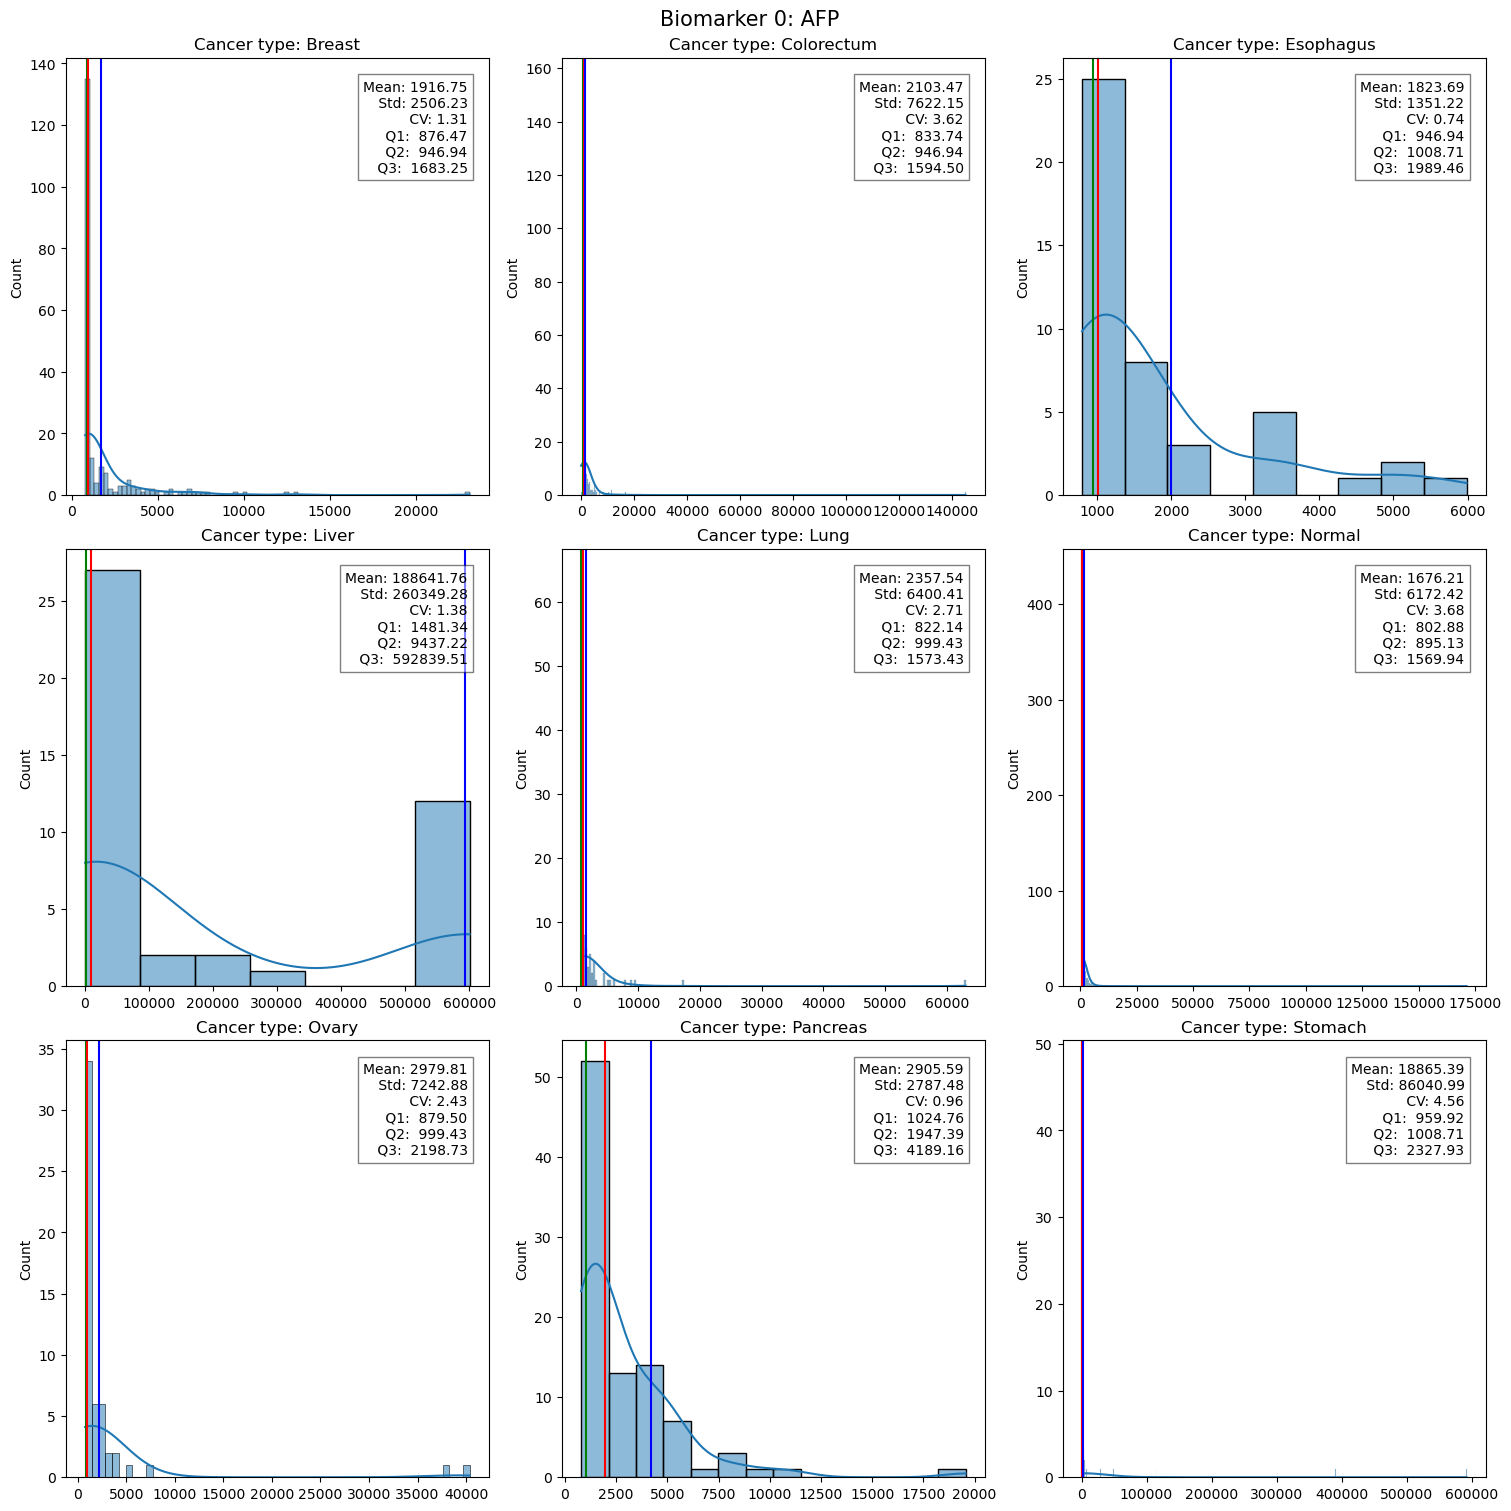

In [8]:
descriptive_statistics(categories = categories, dfs = dfs, biomarker_index = 0)

### 2.3.3 Yuen-Welch's test of `AFP`, `OPN`, `Myeloperoxidase`, `HGF` and `GDF15` levels in `Liver` samples versus all the other cancer types

In [26]:
liver_finalized_biomarkers = []
for i in liver_selected_biomarkers:
    has_p_values_greater_than_threshold, p_df = full_ywtest(cancer_category_index = 3, 
                                                            biomarker_index = i, 
                                                            categories = categories, 
                                                            dfs = dfs,
                                                            p_threshold = 0.05)
    if not has_p_values_greater_than_threshold:
        liver_finalized_biomarkers.append(i)
        print(f"\nBiomarker {i}: {biomarkers[i]}")
        display(p_df)
    else:
        print(f"\nBiomarker {i}: {biomarkers[i]} didn't pass the p-value cutoff.")
        display(p_df)


Biomarker 0: AFP 


,Breast,Colorectum,Esophagus,Lung,Normal,Ovary,Pancreas,Stomach
Liver,0.001791,0.001781,0.001816,0.001784,0.001773,0.001802,0.001904,0.001825



Biomarker 17: HGF  didn't pass the p-value cutoff.


,Breast,Colorectum,Esophagus,Lung,Normal,Ovary,Pancreas,Stomach
Liver,0.000034,0.000232,0.449572,0.000018,0.000009,0.000151,0.00141,0.669668



Biomarker 27: OPN  didn't pass the p-value cutoff.


,Breast,Colorectum,Esophagus,Lung,Normal,Ovary,Pancreas,Stomach
Liver,1.681269e-07,0.000036,0.126098,4.412999e-07,1.271855e-09,0.00003,0.000247,0.064973



Biomarker 15: GDF15  didn't pass the p-value cutoff.


,Breast,Colorectum,Esophagus,Lung,Normal,Ovary,Pancreas,Stomach
Liver,4.226823e-07,0.003002,0.217993,0.000041,5.117955e-08,0.015416,0.404266,0.05992



Biomarker 24: Myeloperoxidase  didn't pass the p-value cutoff.


,Breast,Colorectum,Esophagus,Lung,Normal,Ovary,Pancreas,Stomach
Liver,0.000203,0.000519,0.378072,0.00007,0.000049,0.000367,0.000153,0.280572


## 2.4. RandomForest accuracy scores for classifying liver, ovarian, and pancreatic cancers from normal ones  

### 2.4.1. Normal + Liver with `AFP`, `OPN`, `Myeloperoxidase` and `HGF`

In [31]:
rf_normal_cancers(categories = categories, 
                  dfs = dfs,
                  cancer1_category_index = 3,
                  selected_biomarkers = np.array([0, 17, 24, 27]),
                  test_size = 0.2,
                  iterations = 100,
                  threshold = 0.05)

Random forest classification: Normal + Liver

Average Accuracy over 100 iterations: 0.9094

Biomarkers with Importance >= 0.05:
          Biomarker  Importance
1              HGF     0.369964
3              OPN     0.358134
0              AFP     0.138340
2  Myeloperoxidase     0.133563


,Biomarker,Importance
1,HGF,0.369964
3,OPN,0.358134
0,AFP,0.138340
2,Myeloperoxidase,0.133563


### 2.4.2. Normal + Ovary with `CA-125` and `Prolactin`

In [33]:
# Biomarkers: [{3: CA-125}, {29: Prolactin}]
rf_normal_cancers(categories = categories, 
                  dfs = dfs,
                  cancer1_category_index = 6,
                  selected_biomarkers = np.array([3, 29]),
                  test_size = 0.2,
                  iterations = 100,
                  threshold = 0.05)

Random forest classification: Normal + Ovary

Average Accuracy over 100 iterations: 0.9614

Biomarkers with Importance >= 0.05:
    Biomarker  Importance
0     CA-125     0.546223
1  Prolactin     0.453777


,Biomarker,Importance
0,CA-125,0.546223
1,Prolactin,0.453777


### 2.4.3. Normal + Pancreas with `CA19-9`, `sHER2/sEGFR2/sErbB2` and `Midkine`

In [32]:
rf_normal_cancers(categories = categories, 
                  dfs = dfs,
                  cancer1_category_index = 7,
                  selected_biomarkers = np.array([5, 23, 33]),
                  test_size = 0.2,
                  iterations = 100,
                  threshold = 0.05)

Random forest classification: Normal + Pancreas

Average Accuracy over 100 iterations: 0.9016

Biomarkers with Importance >= 0.05:
              Biomarker  Importance
0               CA19-9     0.411338
2  sHER2/sEGFR2/sErbB2     0.313701
1              Midkine     0.274961


,Biomarker,Importance
0,CA19-9,0.411338
2,sHER2/sEGFR2/sErbB2,0.313701
1,Midkine,0.274961


### 2.4.4. Normal + Liver + Ovary + Pancreas

In [34]:
rf_normal_cancers(categories = categories, 
                  dfs = dfs,
                  cancer1_category_index = 3,
                  cancer2_category_index = 6,
                  cancer3_category_index = 7,
                  selected_biomarkers = np.array([0, 17, 24, 27, 3, 29, 5, 23, 33]),
                  test_size = 0.2,
                  iterations = 100,
                  threshold = 0.05)

Random forest classification: Normal + Liver + Ovary + Pancreas

Average Accuracy over 100 iterations: 0.8317

Biomarkers with Importance >= 0.05:
              Biomarker  Importance
4               CA-125     0.179271
8  sHER2/sEGFR2/sErbB2     0.146810
3                  OPN     0.116334
6               CA19-9     0.114139
1                  HGF     0.108632
0                  AFP     0.101133
5            Prolactin     0.095321
2      Myeloperoxidase     0.080476
7              Midkine     0.057883


,Biomarker,Importance
4,CA-125,0.179271
8,sHER2/sEGFR2/sErbB2,0.146810
3,OPN,0.116334
6,CA19-9,0.114139
1,HGF,0.108632
0,AFP,0.101133
5,Prolactin,0.095321
2,Myeloperoxidase,0.080476
7,Midkine,0.057883


# 3. Analysis of `Breast` and `Colorectum` samples, taken together with random subsamples of `Normal` samples

Now we see two cancer types for which the important biomarkers given by random forest classifier are not suitable in practical scenario for distinguishing between different cancer types from normal samples. None of the biomarkers display uniquely high level for the particular cancer type, and none can be found with Q3 level in top 2 among all the cancer types. 

## 3.1. Analysis of `Normal + Breast` samples

### 3.1.1. Random forest classification for `Normal + Breast` samples

In [7]:
important_biomarkers_normal_breast = rf_normal_cancers(categories = categories, 
                                                       dfs = dfs,
                                                       cancer1_category_index = 0,
                                                       iterations = 100,
                                                       threshold = 0.04)

Random forest classification: Normal + Breast

Average Accuracy over 100 iterations: 0.9630

Biomarkers with Importance >= 0.04:
      Biomarker  Importance
35        TGFa     0.100919
19        IL-8     0.087020
18        IL-6     0.085325
29   Prolactin     0.055615
8   CYFRA 21-1     0.052147
27         OPN     0.048404
16         HE4     0.046379
30       sEGFR     0.043890


And here's list of biomarkers that were selected by random forest classifier for `Normal + Breast` samples.

In [11]:
breast_important_biomarker_indices_in_RF = list(important_biomarkers_normal_breast.index)
breast_important_biomarker_indices_in_RF

[35, 19, 18, 29, 8, 27, 16, 30]

### 3.1.2. Filtering through descriptive statistics of biomarkers in `Normal + Breast` samples

* Uniquely high levels: None
* Higher side filtering: None

Note that, `IL-8` and `IL-6`, being important in regulating immune response and inflammation, are not specific to any one type of cancer. For example, the same two biomarkers are the most important ones in seperating `Normal` and `Colorectum` samples, as shown below. And they can be found in higher levels in some other cancer types. In fact, `IL-6` and `IL-8` Q3 value is the lowest in `Breast` samples among all the cancer types.

Also, we can have a look at the descriptive statistics of `TGFa` to see that it's Q1, Q2 and Q3 values are very close, and in some cases virtually indistinguishable, in `Breast`, `Colorectum`, `Lung`, `Pancreas` and even `Normal` samples.

`Prolactin` levels are much higher in `Liver`, `Lung` and `Ovary` samples than in `Breast` samples.

`CYFRA 21-1` Q1, Q2 and Q3 values are very close in `Breast` and `Colorectum` samples, and can be found in higher levels in the other cancer types. In fact, the Q3 value of `CYFRA 21-1` is the lowest in `Breast` samples among all the cancer types.

`OPN` Q3 levels are the lowest in `Breast` samples among all the cancer types.

`HE4` Q3 levels are the lowest in `Breast` samples among all the cancer types, and even `Normal` samples.

`sEGFR` Q3 levels are higher in `Colorectum`, `Ovary`, `Pancreas` cancer types, and even `Normal` samples.

Now, we see that none of the biomarkers selected by Random Forest is present in uniquely high levels in the `Breast` samples.

In [14]:
breast_biomarkers_uniquely_high = []
for i in breast_important_biomarker_indices_in_RF:
    high_level_found = uniquely_high_level_identification(categories, dfs, biomarker_index = i)[0]
    if high_level_found is not None:
        breast_biomarkers_uniquely_high.append(i)
        
breast_biomarkers_uniquely_high

[]

And none satisfy the higher side filtering criterion.

In [18]:
breast_candidates_for_higher_side_filtering = breast_important_biomarker_indices_in_RF.copy()
if breast_biomarkers_uniquely_high != []:
    breast_candidates_for_higher_side_filtering.remove(breast_biomarkers_uniquely_high[0])

breast_biomarkers_higher_side = []
for i in breast_candidates_for_higher_side_filtering:
    rank = higher_side_filtering_identification(categories, dfs, biomarker_index = i, category_index = 0)
    if rank is not None:
        breast_biomarkers_higher_side.append(i)
        
breast_biomarkers_higher_side

[]

So, we've got no biomarker left at the end of the filtering process.

## 3.2. Analysis of `Normal + Colorectum` samples

### 3.2.1. Random forest classification for `Normal + Colorectum` samples

In [9]:
important_biomarkers_normal_colorectum = rf_normal_cancers(categories = categories, 
                                                           dfs = dfs,
                                                           cancer1_category_index = 1,
                                                           iterations = 100,
                                                           threshold = 0.04)

Random forest classification: Normal + Colorectum

Average Accuracy over 100 iterations: 0.9576

Biomarkers with Importance >= 0.04:
     Biomarker  Importance
19       IL-8     0.135958
18       IL-6     0.095141
27        OPN     0.090611
17        HGF     0.061261
15      GDF15     0.058960
31       sFas     0.057872
29  Prolactin     0.054625


### 3.2.2. Filtering through descriptive statistics of biomarkers in `Normal + Colorectum` samples

* Uniquely high levels: None
* Higher side filtering: None

Note that, `IL-8` and `IL-6`, being important in regulating immune response and inflammation, are not specific to any one type of cancer. For example, the same two biomarkers are two of the most important ones in separating `Normal` and `Breast` samples, as shown above. And they can be found in higher levels in some other cancer types, such as `Esophagus`, `Liver` and `Lung` samples.

`OPN` Q3 levels are much higher in `Esophagus`, `Liver`, and `Stomach` samples than in `Colorectum` samples.

`HGF` Q3 levels are higher in `Pancreas` samples, and much higher in `Esophagus`, `Liver`, and `Stomach` samples than in `Colorectum` samples.

`GDF15` Q3 levels are close in `Colorectum` and Ovary samples, and higher in `Esophagus`, `Liver`, `Stomach` and `Pancreas` samples than in `Colorectum` samples.

`sFas` Q3 levels are higher in `Breast`, `Esophagus`, `Liver`, `Lung`, `Pancreas`, `Stomach` and even `Normal` samples than in `Colorectum` samples.

`Prolactin` levels are much higher in `Liver`, `Lung` and `Ovary` samples than in `Colorectum` samples.



# 4. Analysis of `Esophagus`, `Lung` and `Stomach` samples, taken together with random subsamples of `Normal` samples

### 4.1. Random forest classification for `Normal + Esophagus` samples

* Uniquely high levels: None
* Higher side filtering: `IL-6`(1st), `TIMP-1` (1st), `IL-8` (2nd), `OPN` (2nd), `Myeloperoxidase` (2nd)

`OPN` Q2 and Q3 levels are close in `Esophagus` and `Stomach` samples, and higher in `Liver` samples. Since `OPN` Q3 level in `Esophagus` is in top 2 among cancer types, we consider it as a potential biomarker for `Esophagus` cancer.

`HGF` Q3 levels are higher in `Liver` and `Stomach` samples.

`IL-6` and `IL-8`, being important in regulating immune response and inflammation, are not specific to any one type of cancer. For example, the same two biomarkers are two of the most important ones in separating `Normal` and `Breast` samples, and also `Normal` and `Colorectum` samples, as shown above. But `IL-6` and `IL-8` Q3 level in `Esophagus` is in top 2 among cancer types, and we consider it as a potential biomarker for `Esophagus` cancer.

`Myeloperoxidase` Q3 levels are higher only in `Liver` samples. Since `Myeloperoxidase` Q3 level in `Esophagus` is in top 2 among cancer types, we consider it as a potential biomarker for `Esophagus` cancer.

`GDF15` Q3 levels are higher in `Liver` and `Pancreas` samples.

`TIMP-1`: Despite being present in high levels in `Liver`, `Ovary`, `Pancreas` and `Stomach` samples, `TIMP-1` Q3 levels are the highest in `Esophagus` samples. Hence, we consider it as a potential biomarker for `Esophagus` cancer.

`sEGFR` levels are higher in almost all cancer types and even `Normal` samples, except `Stomach` samples.

In [35]:
important_biomarkers_normal_esophagus = rf_normal_cancers(categories = categories, 
                                                          dfs = dfs,
                                                          cancer1_category_index = 2,
                                                          iterations = 100,
                                                          threshold = 0.04)

Random forest classification: Normal + Esophagus

Average Accuracy over 100 iterations: 0.8617

Biomarkers with Importance >= 0.04:
           Biomarker  Importance
27              OPN     0.098270
17              HGF     0.096577
18             IL-6     0.078884
19             IL-8     0.068289
24  Myeloperoxidase     0.060353
15            GDF15     0.060257
37           TIMP-1     0.051771
30            sEGFR     0.040355


In [36]:
esophagus_important_biomarker_indices_in_RF = list(important_biomarkers_normal_esophagus.index)
esophagus_important_biomarker_indices_in_RF

[27, 17, 18, 19, 24, 15, 37, 30]

In [37]:
esophagus_biomarkers_uniquely_high = []
for i in esophagus_important_biomarker_indices_in_RF:
    high_level_found = uniquely_high_level_identification(categories, dfs, biomarker_index = i)[0]
    if high_level_found is not None:
        esophagus_biomarkers_uniquely_high.append(i)

In [39]:
candidates_for_higher_side_filtering = esophagus_important_biomarker_indices_in_RF.copy()
if esophagus_biomarkers_uniquely_high != []:
    candidates_for_higher_side_filtering.remove(esophagus_biomarkers_uniquely_high[0])

esophagus_biomarkers_higher_side = []
for i in candidates_for_higher_side_filtering:
    rank = higher_side_filtering_identification(categories, dfs, biomarker_index = i, category_index = 2)
    if rank is not None:
        esophagus_biomarkers_higher_side.append(i)


Biomarker 27: OPN 
The biomarker's Q3 level is the second highest in the given category.

Biomarker 18: IL-6 
The biomarker's Q3 level is the highest in the given category.

Biomarker 19: IL-8 
The biomarker's Q3 level is the second highest in the given category.

Biomarker 24: Myeloperoxidase 
The biomarker's Q3 level is the second highest in the given category.

Biomarker 37: TIMP-1 
The biomarker's Q3 level is the highest in the given category.


In [41]:
esophagus_selected_biomarkers = esophagus_biomarkers_uniquely_high + esophagus_biomarkers_higher_side

[biomarkers[i] for i in esophagus_selected_biomarkers]

['OPN ', 'IL-6 ', 'IL-8 ', 'Myeloperoxidase ', 'TIMP-1 ']

In [42]:
esophagus_finalized_biomarkers = []
for i in esophagus_selected_biomarkers:
    has_p_values_greater_than_threshold, p_df = full_ywtest(cancer_category_index = 2, 
                                                            biomarker_index = i, 
                                                            categories = categories, 
                                                            dfs = dfs,
                                                            p_threshold = 0.05)
    if not has_p_values_greater_than_threshold:
        esophagus_finalized_biomarkers.append(i)
        print(f"\nBiomarker {i}: {biomarkers[i]}")
        display(p_df)
    else:
        print(f"\nBiomarker {i}: {biomarkers[i]} didn't pass the p-value cutoff.")
        display(p_df)


Biomarker 27: OPN  didn't pass the p-value cutoff.


,Breast,Colorectum,Liver,Lung,Normal,Ovary,Pancreas,Stomach
Esophagus,0.000004,0.002299,0.126098,0.000015,8.602151e-09,0.002064,0.016719,0.859041



Biomarker 18: IL-6  didn't pass the p-value cutoff.


,Breast,Colorectum,Liver,Lung,Normal,Ovary,Pancreas,Stomach
Esophagus,0.000056,0.00053,0.18638,0.012079,0.000011,0.001099,0.001523,0.001212



Biomarker 19: IL-8  didn't pass the p-value cutoff.


,Breast,Colorectum,Liver,Lung,Normal,Ovary,Pancreas,Stomach
Esophagus,0.000087,0.004256,0.396322,0.000398,0.000018,0.000807,0.269314,0.82043



Biomarker 24: Myeloperoxidase  didn't pass the p-value cutoff.


,Breast,Colorectum,Liver,Lung,Normal,Ovary,Pancreas,Stomach
Esophagus,0.003723,0.009067,0.378072,0.001306,0.000913,0.006547,0.00283,0.881598



Biomarker 37: TIMP-1  didn't pass the p-value cutoff.


,Breast,Colorectum,Liver,Lung,Normal,Ovary,Pancreas,Stomach
Esophagus,0.000002,0.00021,0.1256,0.000007,9.282458e-07,0.164092,0.165575,0.03306


* `OPN` is shared with `Liver`. We keep it.
`IL-6` is not in `Liver`. Dropped.
`IL-8` p_value cutoff is not met in two comparisons. Dropped.
``

### 4.2. Random forest classification for `Normal + Lung` samples

* Uniquely high levels: None
* Higher side filtering: `CYFRA 21-1` (1st), `Prolactin` (2nd), `IL-6` (2nd)

`NSE` Q3 level in `Lung` samples is the lowest among all the cancer types, and even the `Normal` samples.

`Prolactin` Q3 levels in `Lung` samples is in the top 2 among all the cancer types. Hence we consider it a potential biomarker for `Lung` cancer.

`IL-8` relatively lower.

`IL-6` Q3 levels in `Lung` samples are in the top 2 among all the cancer types. Hence, we consider it as a potential biomarker for `Lung` cancer.

`GDF15` relatively lower.

`OPN` relatively lower.

`CYFRA 21-1` Q3 levels are the highest in `Lung` samples. Hence we consider it a potential biomarker for `Lung` cancer.

In [11]:
important_biomarkers_normal_lung = rf_normal_cancers(categories = categories, 
                                                     dfs = dfs,
                                                     cancer1_category_index = 4,
                                                     iterations = 100,
                                                     threshold = 0.04)

Random forest classification: Normal + Lung

Average Accuracy over 100 iterations: 0.9769

Biomarkers with Importance >= 0.04:
      Biomarker  Importance
29   Prolactin     0.156559
19        IL-8     0.080851
25         NSE     0.079439
18        IL-6     0.074091
15       GDF15     0.052625
27         OPN     0.051229
8   CYFRA 21-1     0.047263


### 4.3. Random forest classification for `Normal + Stomach` samples

* Uniquely high levels: None
* Higher side filtering: `IL-8` (1st), `HGF` (1st)

`IL-6` relatively lower.

`IL-8` Q3 level is the highest in `Stomach` samples. Hence, we consider it as a potential biomarker for `Stomach` cancer.

`GDF15` relatively lower.

`HGF` Q3 level is the highest in `Stomach` samples. Hence, we consider it as a potential biomarker for `Stomach` cancer.

`sEGFR` relatively lower.

`CYFRA 21-1` relatively lower.

`Myeloperoxidase` Q3 levels are higher in `Liver` and `Esophagus` samples.

In [12]:
important_biomarkers_normal_stomach = rf_normal_cancers(categories = categories, 
                                                        dfs = dfs,
                                                        cancer1_category_index = 8,
                                                        iterations = 100,
                                                        threshold = 0.04)

Random forest classification: Normal + Stomach

Average Accuracy over 100 iterations: 0.9304

Biomarkers with Importance >= 0.04:
           Biomarker  Importance
27              OPN     0.152077
18             IL-6     0.088584
19             IL-8     0.075116
15            GDF15     0.066546
17              HGF     0.063138
30            sEGFR     0.056581
8        CYFRA 21-1     0.043083
24  Myeloperoxidase     0.042440


# 5. Summary of findings - venn diagrams